In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [4]:
df=pd.read_csv('df3.csv')

In [5]:
df.head()

,date_visite_diagnostiqueur,estimation_ges,annee_construction,surface_habitable,code_insee_commune,geo_score,tv016_departement_code,longitude,latitude,year,month,day,time,asset_cre_target
0,2011-01-26,5.00,1947.0,71.50,19031.0,0.54,19.0,1.534671,45.154174,2011.0,23641,26.0,7.0,8.4
1,2011-04-04,14.00,1947.0,23.10,71153.0,0.74,71.0,4.426975,46.793673,2011.0,23641,4.0,75.0,8.4
2,2011-06-17,38.00,1974.0,171.60,75009.0,0.60,75.0,2.262997,48.919624,2011.0,23641,17.0,149.0,13.0
3,2011-06-20,13.64,1949.0,24.75,78048.0,0.35,78.0,1.668712,48.802809,2011.0,23641,20.0,152.0,13.0
4,2011-08-31,14.00,1947.0,23.10,84003.0,0.96,84.0,5.396156,43.876791,2011.0,23641,31.0,224.0,13.0


In [6]:
# Conversion en datetime
df['date_visite_diagnostiqueur'] = pd.to_datetime(df['date_visite_diagnostiqueur'])
df['month']=df['date_visite_diagnostiqueur'].dt.to_period('M')
df['days_elapsed'] = df['time'] + 19  # Ajoute 19 jours
df = df.drop(columns=['time'])  # Supprime l'ancienne colonne si nécessaire
df.head()

df.head()

,date_visite_diagnostiqueur,estimation_ges,annee_construction,surface_habitable,code_insee_commune,geo_score,tv016_departement_code,longitude,latitude,year,month,day,asset_cre_target,days_elapsed
0,2011-01-26,5.00,1947.0,71.50,19031.0,0.54,19.0,1.534671,45.154174,2011.0,2011-01,26.0,8.4,26.0
1,2011-04-04,14.00,1947.0,23.10,71153.0,0.74,71.0,4.426975,46.793673,2011.0,2011-04,4.0,8.4,94.0
2,2011-06-17,38.00,1974.0,171.60,75009.0,0.60,75.0,2.262997,48.919624,2011.0,2011-06,17.0,13.0,168.0
3,2011-06-20,13.64,1949.0,24.75,78048.0,0.35,78.0,1.668712,48.802809,2011.0,2011-06,20.0,13.0,171.0
4,2011-08-31,14.00,1947.0,23.10,84003.0,0.96,84.0,5.396156,43.876791,2011.0,2011-08,31.0,13.0,243.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401820 entries, 0 to 401819
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date_visite_diagnostiqueur  401820 non-null  datetime64[ns]
 1   estimation_ges              401820 non-null  float64       
 2   annee_construction          401820 non-null  float64       
 3   surface_habitable           401820 non-null  float64       
 4   code_insee_commune          401820 non-null  float64       
 5   geo_score                   401820 non-null  float64       
 6   tv016_departement_code      401820 non-null  float64       
 7   longitude                   401820 non-null  float64       
 8   latitude                    401820 non-null  float64       
 9   year                        401820 non-null  float64       
 10  month                       401820 non-null  period[M]     
 11  day                         401820 non-

/tmp/ipykernel_2612686/172762320.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['estimation_ges'].dropna())


<Axes: xlabel='estimation_ges', ylabel='Density'>

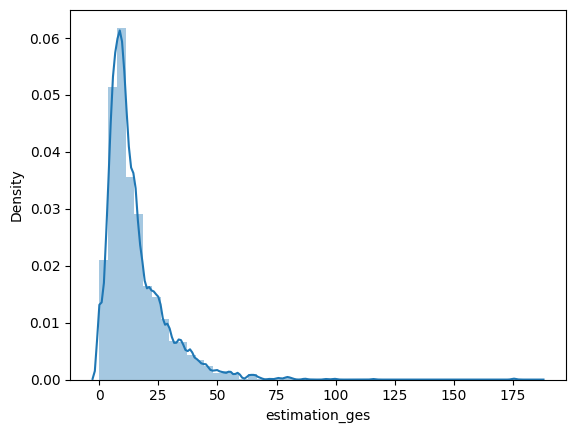

In [8]:
plt.figure()
sns.distplot(df['estimation_ges'].dropna())

In [9]:
def weighted_avg(x):
    valid = x.dropna(subset=['estimation_ges', 'surface_habitable'])
    # Exclure les lignes où estimation_ges est nul (0)
    valid = valid[valid['estimation_ges'] != 0]
    
    total_surface = valid['surface_habitable'].sum()
    if total_surface != 0:
        return (valid['estimation_ges'] * valid['surface_habitable']).sum() / total_surface
    return None





# --- Agrégation par mois ---
aggregation_month = df.groupby(['asset_cre_target', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month').dropna()


/tmp/ipykernel_2612686/1915983186.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregation_month = df.groupby(['asset_cre_target', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month').dropna()


In [10]:
aggregation_month['month']

0      2013-04
1      2013-05
2      2013-06
3      2013-07
4      2013-08
        ...   
734    2024-10
735    2024-11
736    2024-12
737    2025-01
738    2025-04
Name: month, Length: 739, dtype: period[M]

In [11]:
aggregation_month.columns

Index(['asset_cre_target', 'month', 'weighted_estimation_ges_month'], dtype='object')

In [12]:
aggregation_month=aggregation_month.set_index('month')


In [13]:
df_centre_commercial = aggregation_month[aggregation_month['asset_cre_target'] == 7.7]
df_batiment_a_usage_principal_bureau_administration_enseignement = aggregation_month[aggregation_month['asset_cre_target'] == 8.4]
df_batiment_a_occupation_continue = aggregation_month[aggregation_month['asset_cre_target'] == 13]
df_autres_cas = aggregation_month[aggregation_month['asset_cre_target'] == 15.94]
df_autres = aggregation_month[aggregation_month['asset_cre_target'] == 13]


In [14]:
df_batiment_a_usage_principal_bureau_administration_enseignement.head()

,asset_cre_target,weighted_estimation_ges_month
month,,
2011-01,8.4,5.00
2011-04,8.4,14.00
2011-10,8.4,7.38
2012-07,8.4,5.00
2012-11,8.4,16.00


In [15]:
df_centre_commercial = df_centre_commercial.drop('asset_cre_target', axis=1)
df_batiment_a_usage_principal_bureau_administration_enseignement = df_batiment_a_usage_principal_bureau_administration_enseignement.drop('asset_cre_target', axis=1)
df_batiment_a_occupation_continue = df_batiment_a_occupation_continue.drop('asset_cre_target', axis=1)
df_autres_cas = df_autres_cas.drop('asset_cre_target', axis=1)
df_autres = df_autres.drop('asset_cre_target', axis=1)

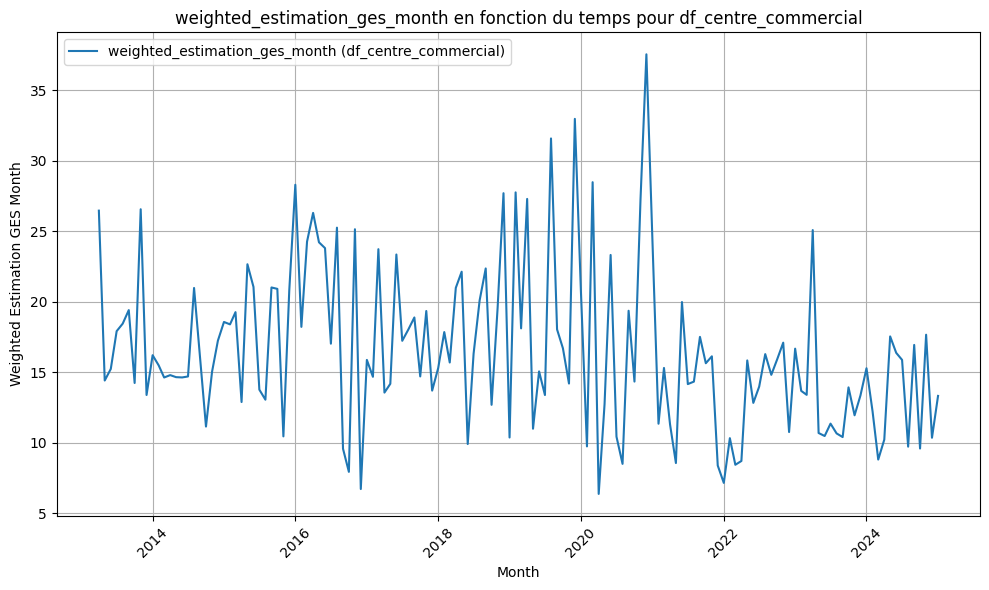

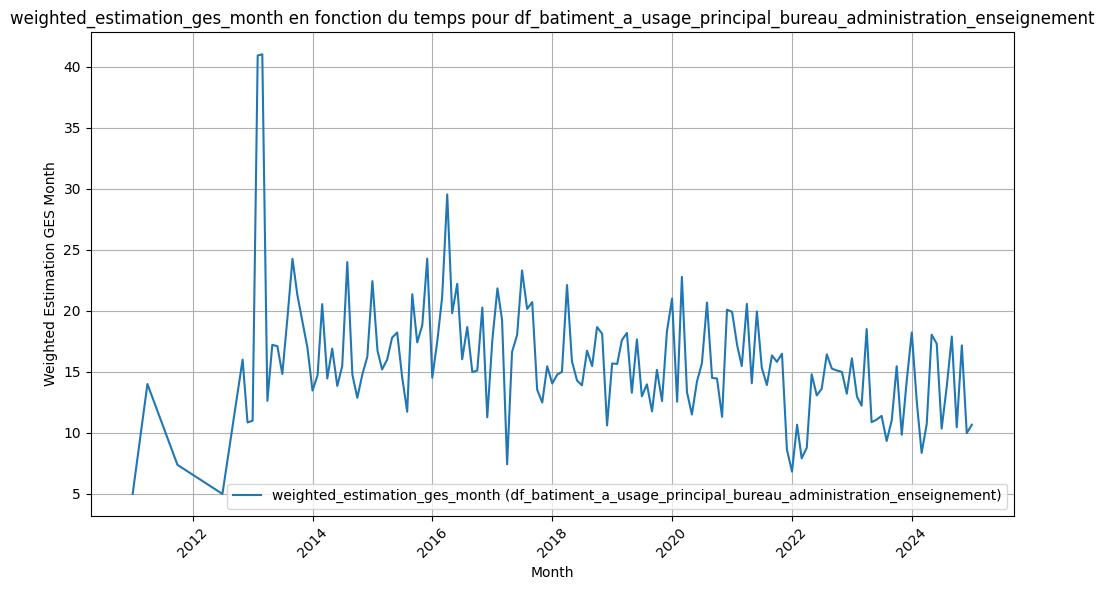

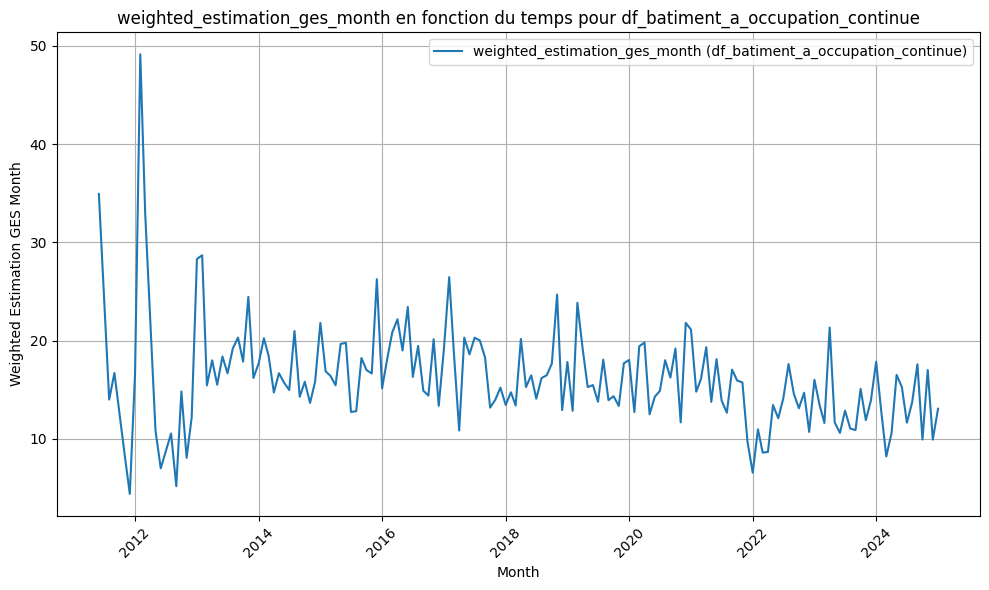

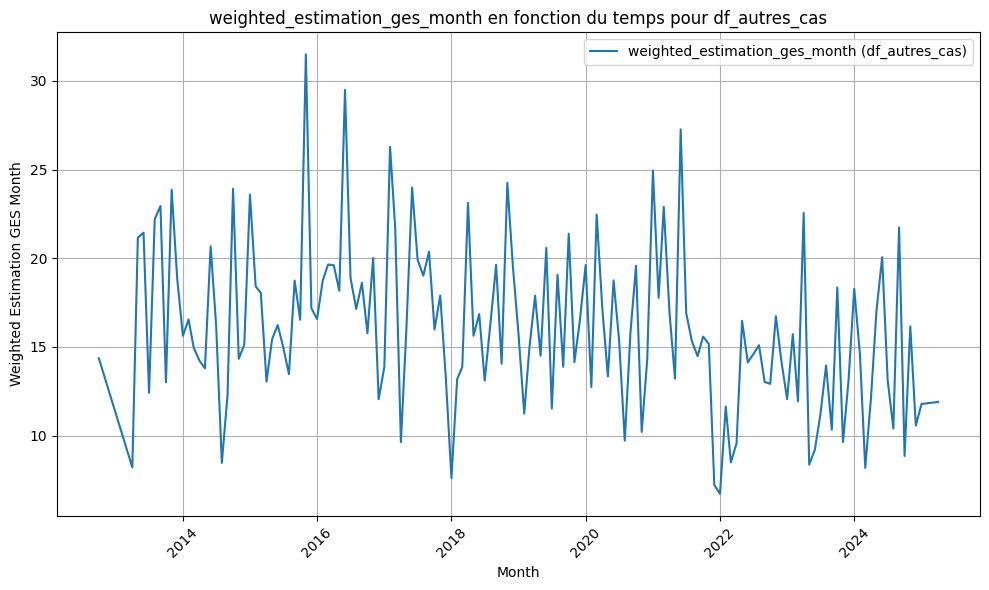

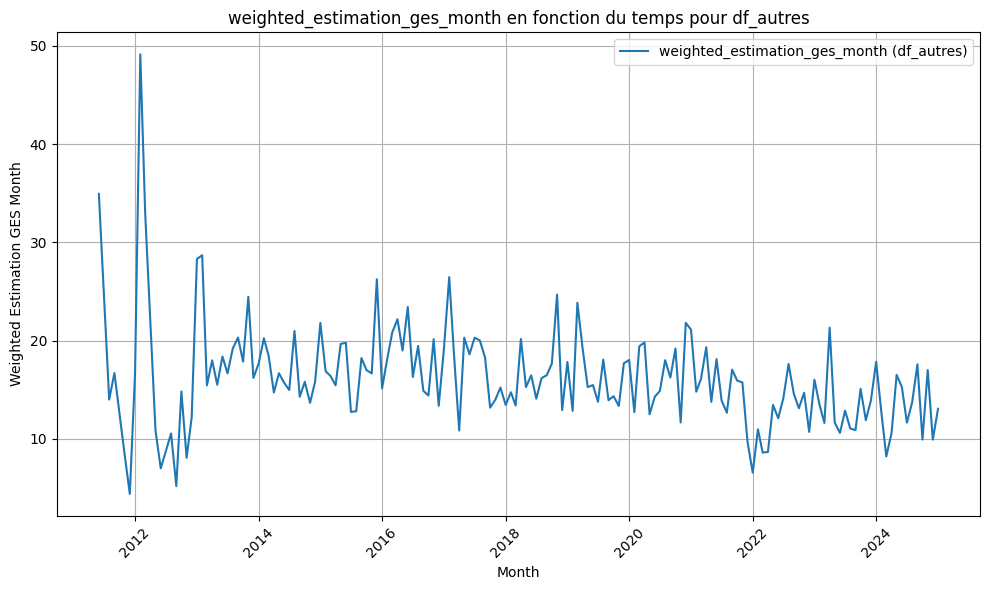

In [16]:
# Liste des DataFrames
dfs = [
    df_centre_commercial,
    df_batiment_a_usage_principal_bureau_administration_enseignement,
    df_batiment_a_occupation_continue,
    df_autres_cas,
    df_autres
]

# Noms des DataFrames pour les titres des graphiques
df_names = [
    'df_centre_commercial',
    'df_batiment_a_usage_principal_bureau_administration_enseignement',
    'df_batiment_a_occupation_continue',
    'df_autres_cas',
    'df_autres'
]

# Création des graphiques
for df, name in zip(dfs, df_names):
    plt.figure(figsize=(10, 6))
    # Conversion de l'index de Period en Timestamp pour l'affichage
    plt.plot(df.index.to_timestamp(), df['weighted_estimation_ges_month'], label=f'weighted_estimation_ges_month ({name})')
    plt.title(f'weighted_estimation_ges_month en fonction du temps pour {name}')
    plt.xlabel('Month')
    plt.ylabel('Weighted Estimation GES Month')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Traitement de df_centre_commercial...


2025-03-20 10:51:17.562908: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/onyxia/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000


6/6 - 3s - 488ms/step - loss: 366.9548 - val_loss: 193.0103
Epoch 2/1000
6/6 - 0s - 38ms/step - loss: 366.8479 - val_loss: 192.9733
Epoch 3/1000
6/6 - 0s - 37ms/step - loss: 366.4857 - val_loss: 192.9365
Epoch 4/1000
6/6 - 0s - 43ms/step - loss: 366.7352 - val_loss: 192.8994
Epoch 5/1000
6/6 - 0s - 41ms/step - loss: 366.7311 - val_loss: 192.8622
Epoch 6/1000
6/6 - 0s - 41ms/step - loss: 366.7500 - val_loss: 192.8251
Epoch 7/1000
6/6 - 0s - 35ms/step - loss: 366.5729 - val_loss: 192.7880
Epoch 8/1000
6/6 - 0s - 43ms/step - loss: 366.6652 - val_loss: 192.7509
Epoch 9/1000
6/6 - 0s - 39ms/step - loss: 366.3942 - val_loss: 192.7140
Epoch 10/1000
6/6 - 0s - 45ms/step - loss: 366.4283 - val_loss: 192.6774
Epoch 11/1000
6/6 - 0s - 40ms/step - loss: 366.3224 - val_loss: 192.6406
Epoch 12/1000
6/6 - 0s - 40ms/step - loss: 366.4304 - val_loss: 192.6038
Epoch 13/1000
6/6 - 0s - 53ms/step - loss: 366.0333 - val_loss: 192.5670
Epoch 14/1000
6/6 - 0s - 36ms/step - loss: 366.5256 - val_loss: 192.5301

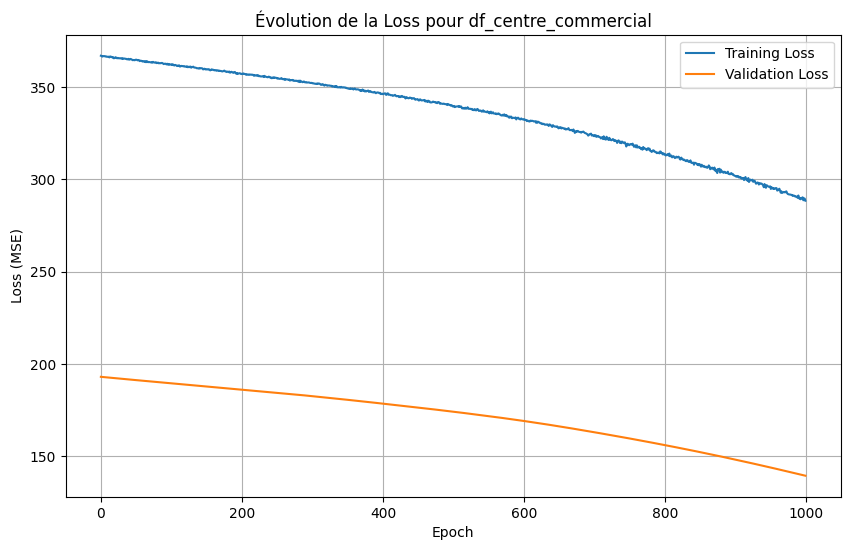

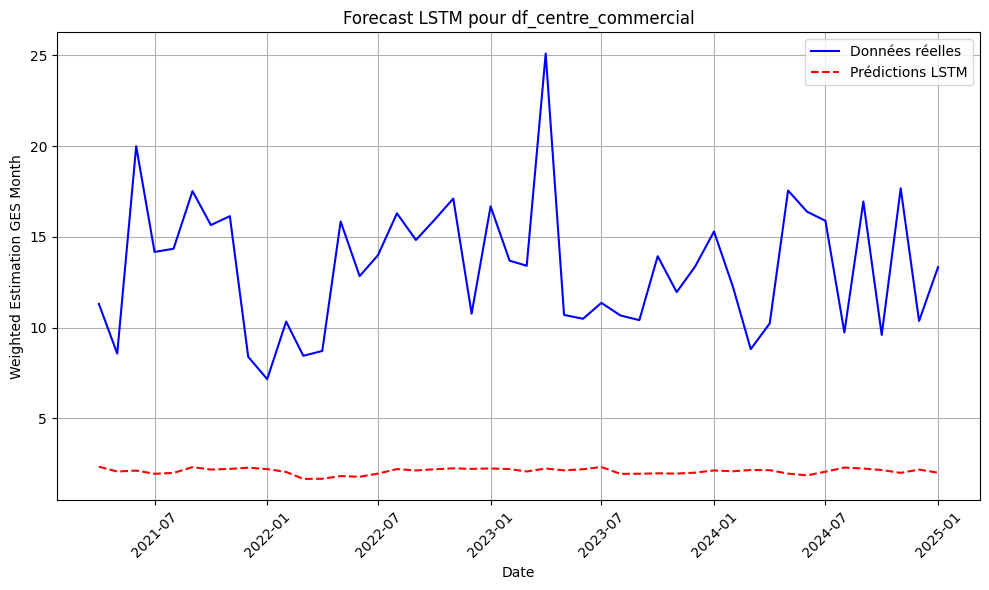


Traitement de df_batiment_a_usage_principal_bureau_administration_enseignement...
Epoch 1/1000


/home/onyxia/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 376ms/step - loss: 313.9760 - val_loss: 198.4765
Epoch 2/1000
7/7 - 0s - 56ms/step - loss: 314.3416 - val_loss: 198.4312
Epoch 3/1000
7/7 - 0s - 36ms/step - loss: 314.0851 - val_loss: 198.3862
Epoch 4/1000
7/7 - 0s - 35ms/step - loss: 314.1134 - val_loss: 198.3414
Epoch 5/1000
7/7 - 0s - 32ms/step - loss: 314.1450 - val_loss: 198.2970
Epoch 6/1000
7/7 - 0s - 38ms/step - loss: 313.8109 - val_loss: 198.2523
Epoch 7/1000
7/7 - 0s - 35ms/step - loss: 313.8227 - val_loss: 198.2072
Epoch 8/1000
7/7 - 0s - 36ms/step - loss: 313.9425 - val_loss: 198.1620
Epoch 9/1000
7/7 - 0s - 32ms/step - loss: 313.7376 - val_loss: 198.1171
Epoch 10/1000
7/7 - 0s - 36ms/step - loss: 313.9174 - val_loss: 198.0733
Epoch 11/1000
7/7 - 0s - 36ms/step - loss: 313.5563 - val_loss: 198.0288
Epoch 12/1000
7/7 - 0s - 35ms/step - loss: 313.5996 - val_loss: 197.9846
Epoch 13/1000
7/7 - 0s - 43ms/step - loss: 313.4171 - val_loss: 197.9397
Epoch 14/1000
7/7 - 0s - 32ms/step - loss: 313.3138 - val_loss: 197.8959

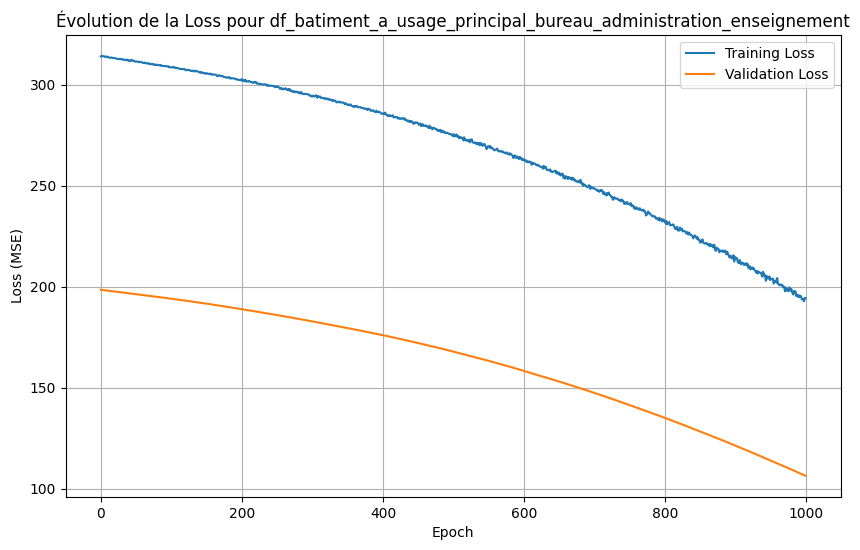

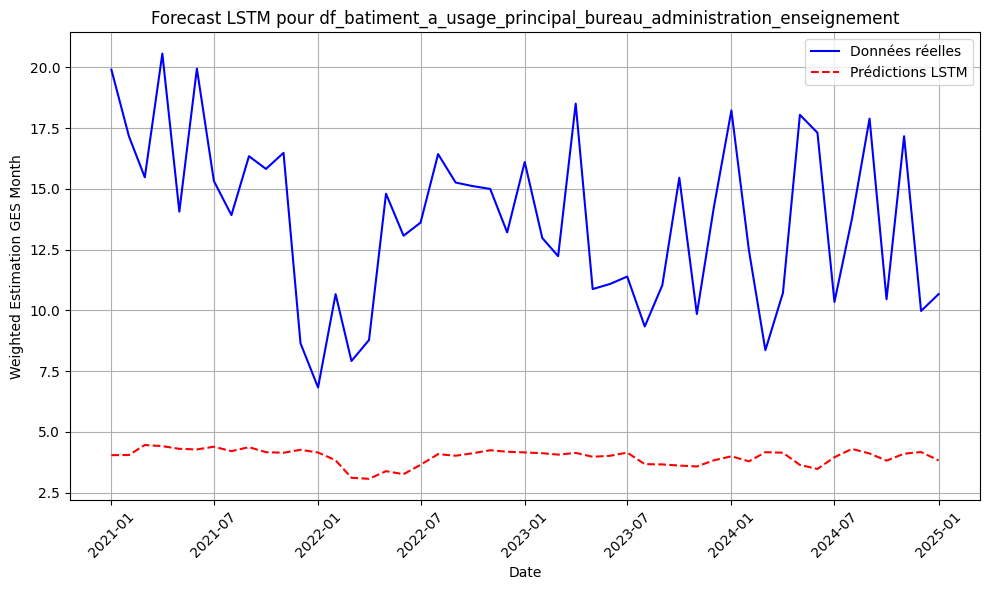


Traitement de df_batiment_a_occupation_continue...
Epoch 1/1000


/home/onyxia/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 432ms/step - loss: 328.3117 - val_loss: 205.8233
Epoch 2/1000
7/7 - 0s - 52ms/step - loss: 328.3904 - val_loss: 205.7723
Epoch 3/1000
7/7 - 0s - 32ms/step - loss: 328.0649 - val_loss: 205.7213
Epoch 4/1000
7/7 - 0s - 32ms/step - loss: 328.3107 - val_loss: 205.6707
Epoch 5/1000
7/7 - 0s - 34ms/step - loss: 328.1858 - val_loss: 205.6203
Epoch 6/1000
7/7 - 0s - 42ms/step - loss: 328.0636 - val_loss: 205.5697
Epoch 7/1000
7/7 - 0s - 34ms/step - loss: 328.0309 - val_loss: 205.5193
Epoch 8/1000
7/7 - 0s - 35ms/step - loss: 328.2356 - val_loss: 205.4691
Epoch 9/1000
7/7 - 0s - 33ms/step - loss: 327.6670 - val_loss: 205.4190
Epoch 10/1000
7/7 - 0s - 33ms/step - loss: 327.5663 - val_loss: 205.3680
Epoch 11/1000
7/7 - 0s - 33ms/step - loss: 327.8876 - val_loss: 205.3175
Epoch 12/1000
7/7 - 0s - 32ms/step - loss: 327.3642 - val_loss: 205.2662
Epoch 13/1000
7/7 - 0s - 29ms/step - loss: 327.7685 - val_loss: 205.2155
Epoch 14/1000
7/7 - 0s - 37ms/step - loss: 327.7935 - val_loss: 205.1647

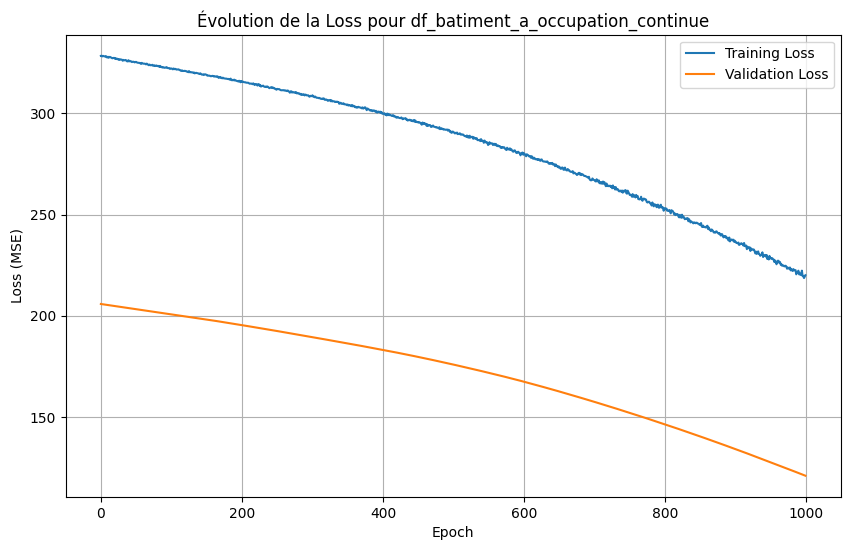

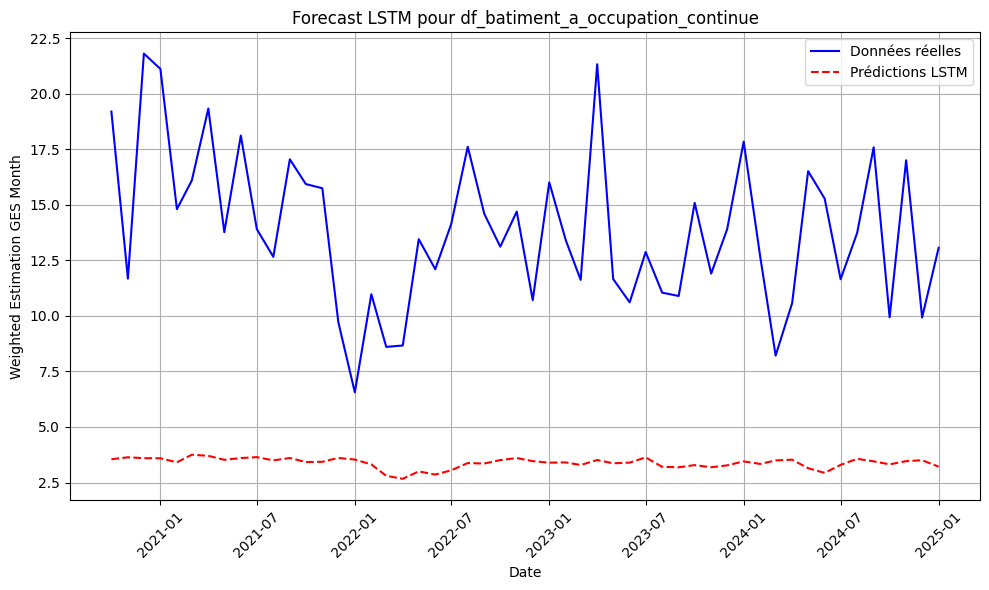


Traitement de df_autres_cas...
Epoch 1/1000


/home/onyxia/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 3s - 456ms/step - loss: 313.7899 - val_loss: 203.5059
Epoch 2/1000
6/6 - 0s - 39ms/step - loss: 313.5093 - val_loss: 203.4689
Epoch 3/1000
6/6 - 0s - 35ms/step - loss: 313.6630 - val_loss: 203.4319
Epoch 4/1000
6/6 - 0s - 33ms/step - loss: 313.0658 - val_loss: 203.3947
Epoch 5/1000
6/6 - 0s - 40ms/step - loss: 313.3495 - val_loss: 203.3577
Epoch 6/1000
6/6 - 0s - 42ms/step - loss: 313.2221 - val_loss: 203.3204
Epoch 7/1000
6/6 - 0s - 36ms/step - loss: 313.3144 - val_loss: 203.2830
Epoch 8/1000
6/6 - 0s - 42ms/step - loss: 313.0366 - val_loss: 203.2458
Epoch 9/1000
6/6 - 0s - 40ms/step - loss: 313.0816 - val_loss: 203.2082
Epoch 10/1000
6/6 - 0s - 41ms/step - loss: 312.7162 - val_loss: 203.1706
Epoch 11/1000
6/6 - 0s - 39ms/step - loss: 312.9868 - val_loss: 203.1330
Epoch 12/1000
6/6 - 0s - 37ms/step - loss: 313.1693 - val_loss: 203.0954
Epoch 13/1000
6/6 - 0s - 37ms/step - loss: 313.1914 - val_loss: 203.0581
Epoch 14/1000
6/6 - 0s - 38ms/step - loss: 312.5988 - val_loss: 203.0210

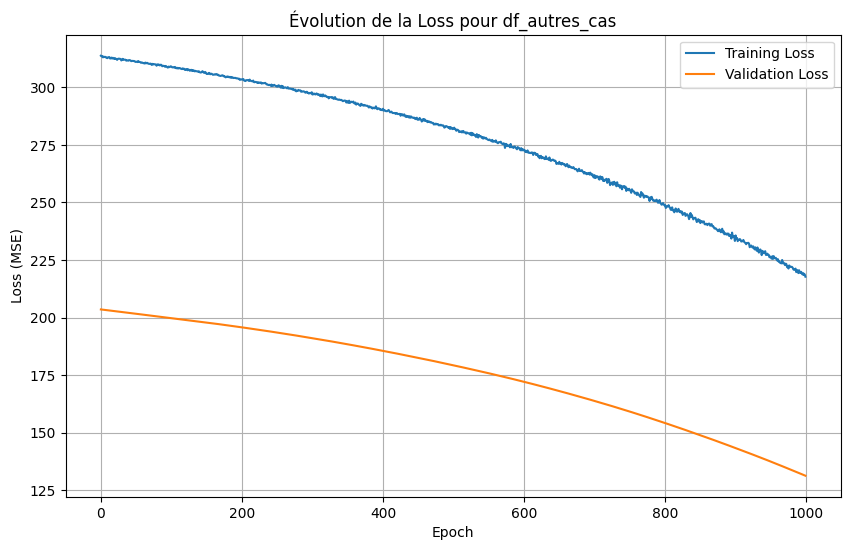

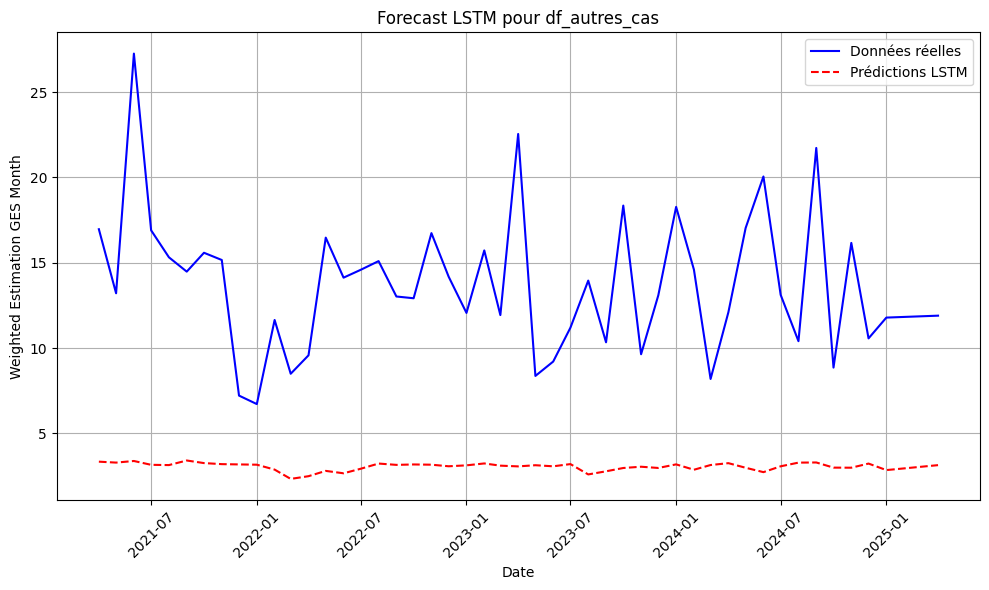


Traitement de df_autres...
Epoch 1/1000


/home/onyxia/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 462ms/step - loss: 325.9293 - val_loss: 204.5229
Epoch 2/1000
7/7 - 0s - 33ms/step - loss: 326.0239 - val_loss: 204.4723
Epoch 3/1000
7/7 - 0s - 35ms/step - loss: 325.7691 - val_loss: 204.4221
Epoch 4/1000
7/7 - 0s - 33ms/step - loss: 325.9356 - val_loss: 204.3722
Epoch 5/1000
7/7 - 0s - 33ms/step - loss: 326.0613 - val_loss: 204.3219
Epoch 6/1000
7/7 - 0s - 33ms/step - loss: 325.7578 - val_loss: 204.2718
Epoch 7/1000
7/7 - 0s - 42ms/step - loss: 325.6635 - val_loss: 204.2215
Epoch 8/1000
7/7 - 0s - 35ms/step - loss: 325.6738 - val_loss: 204.1722
Epoch 9/1000
7/7 - 0s - 35ms/step - loss: 325.5334 - val_loss: 204.1231
Epoch 10/1000
7/7 - 0s - 34ms/step - loss: 325.2704 - val_loss: 204.0739
Epoch 11/1000
7/7 - 0s - 35ms/step - loss: 325.6182 - val_loss: 204.0245
Epoch 12/1000
7/7 - 0s - 37ms/step - loss: 325.5743 - val_loss: 203.9740
Epoch 13/1000
7/7 - 0s - 39ms/step - loss: 325.1075 - val_loss: 203.9238
Epoch 14/1000
7/7 - 0s - 34ms/step - loss: 325.2571 - val_loss: 203.8741

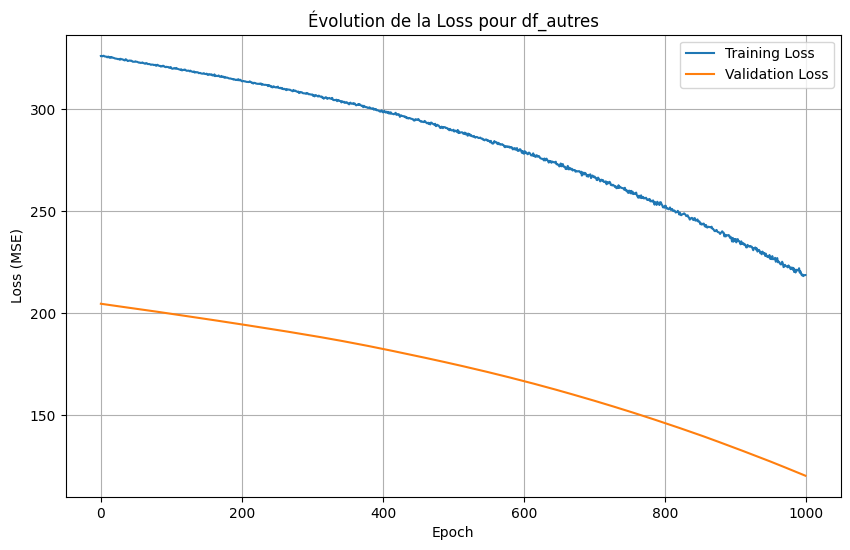

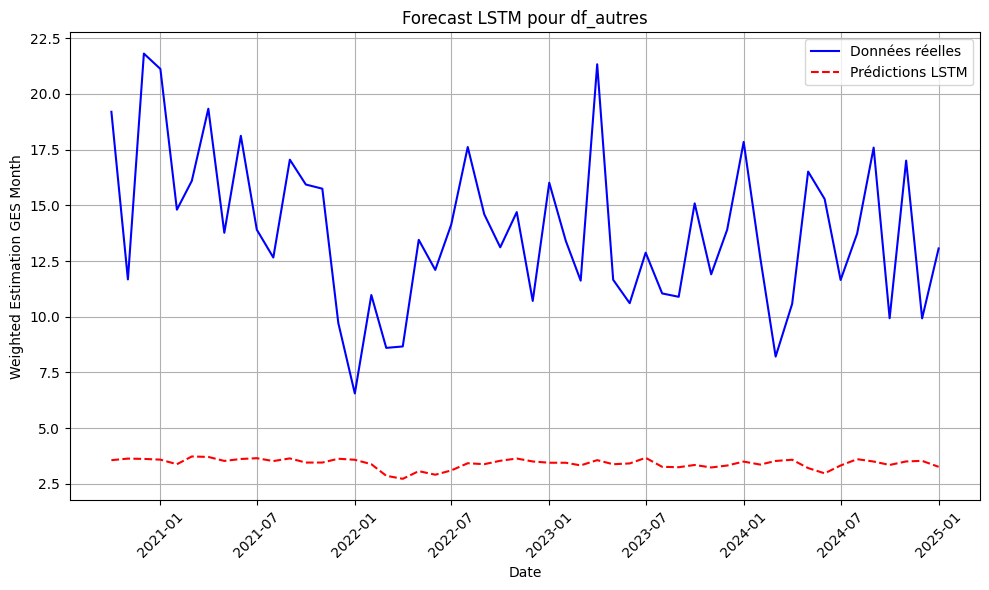

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Fonction pour créer les séquences d'entrée/sortie à partir de la série temporelle
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

for df, name in zip(dfs, df_names):
    print(f"\nTraitement de {name}...")

   
    data = df['weighted_estimation_ges_month'].values.reshape(-1, 1)

   
    look_back = 3  
    X, Y = create_dataset(data, look_back)
   
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

   
    train_size = int(len(X) * 0.67)
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    
    model = Sequential()

    
    lstm_units_1 = 128
    model.add(LSTM(lstm_units_1, input_shape=(look_back, 1), return_sequences=True))
    dropout_rate_1 = 0.2
    model.add(Dropout(dropout_rate_1))

    
    lstm_units_2 = 128
    model.add(LSTM(lstm_units_2, return_sequences=False))
    dropout_rate_2 = 0.2
    model.add(Dropout(dropout_rate_2))

   
    dense_units = 128
    model.add(Dense(dense_units, activation='relu'))

   
    model.add(Dense(1))

   
    learning_rate = 0.000001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

   
    epochs = 1000
    batch_size = 16
    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2,
        validation_data=(X_test, Y_test)
    )

   
    train_predictions = model.predict(X_train)
    
    Y_train_actual = Y_train.reshape(-1, 1)

   
    test_predictions = model.predict(X_test)
    Y_test_actual = Y_test.reshape(-1, 1)

   
    mse_train = mean_squared_error(Y_train_actual, train_predictions)
    rmse_train = math.sqrt(mse_train)

    
    mse_test = mean_squared_error(Y_test_actual, test_predictions)
    rmse_test = math.sqrt(mse_test)

    print(f"\n{name} :")
    print(f"Train MSE: {mse_train:.4f}, Train RMSE: {rmse_train:.4f}")
    print(f"Test MSE: {mse_test:.4f}, Test RMSE: {rmse_test:.4f}")

   
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Évolution de la Loss pour {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    
    plt.plot(df.index.to_timestamp()[look_back+train_size:], Y_test_actual, label='Données réelles', color='blue')
    plt.plot(df.index.to_timestamp()[look_back+train_size:], test_predictions, label='Prédictions LSTM', color='red', linestyle='--')

    plt.title(f'Forecast LSTM pour {name}')
    plt.xlabel('Date')
    plt.ylabel('Weighted Estimation GES Month')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

